## Goals of the Case Study

#### There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#importing useful libararies. We will keep importing more libraries as and when required 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read and Analyze dataset given

In [2]:
data = pd.read_csv("Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Understanding volume of data
print(f"Number of records: {data.shape[0]}\nNumber of features: {data.shape[1]}")

Number of records: 9240
Number of features: 37


In [5]:
# Lead converted in original dataset

data["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [6]:
data["Converted"].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

* **From above we can see in Original dataset 38.53% lead were converted to Yes.**

In [7]:
# check for datatype and null information using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

**Observations from above**

- Data types seems to be correct for almost all features at this point of time except few listed below
- for feature TotalVisits which have float64 data type, as per data dictionary it is "The total number of visits made by the customer on the website." We can change it to int64 for more accurate representation.
- Few attributes have null values. We will perform null analysis and perform appropriate steps.


## Data Cleaning

### Check for Missing values and their treatments
### Understand more of data by checking their value_counts

In [8]:
# check of % of missing value in each column
data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Observations**
- quite a number of columns have high percentage of missing value
- We will drop the columns having missing value >= 30%

In [9]:
#Getting list of Columns having missing value >= 30%
df = data.isnull().mean().reset_index()
df = df.rename(columns ={"index": "Column Name" , 0: "Percenatge Missing Value"})
drop_col = list(df[df["Percenatge Missing Value"] >= 0.3]["Column Name"]) # list of columns to be dropped
drop_col

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [10]:
#Dropping columns and assigning data to new dataframe 
data_df = data.drop(drop_col, axis = 1)

In [11]:
print(f"Number of records Before drop: {data.shape[0]}\nNumber of features Before drop: {data.shape[1]}")
print(f"Number of records After drop: {data_df.shape[0]}\nNumber of features After drop: {data_df.shape[1]}")

Number of records Before drop: 9240
Number of features Before drop: 37
Number of records After drop: 9240
Number of features After drop: 31


In [12]:
# Check for missing value again
data_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Missing Value Imputation**
- Check all attribute which still have missing values individually and perform imputation appropriately

In [13]:
# list of columns having missing values
temp = data_df.isnull().mean().reset_index()
temp = temp.rename(columns ={"index": "Column Name" , 0: "Percenatge Missing Value"})
col = list(temp[temp["Percenatge Missing Value"]*100 >= 0.1]["Column Name"]) # list of columns to be dropped
col

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [14]:
# Check for attribute Lead Source
data_df["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
youtubechannel          1
testone                 1
Pay per Click Ads       1
blog                    1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
# only 36 record have null values, imputing those with mode of value
data_df["Lead Source"].mode()[0]

'Google'

In [16]:
data_df["Lead Source"] = data_df["Lead Source"].fillna(data_df["Lead Source"].mode()[0])

In [17]:
# Check for TotalVisits
data_df["TotalVisits"].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [18]:
# 137 record having missing value, impute with mode
data_df["TotalVisits"] = data_df["TotalVisits"].fillna(data_df["TotalVisits"].mode()[0])

In [19]:
# check for "Page Views Per Visit"
data_df["Page Views Per Visit"].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [20]:
#Imputing with mode
data_df["Page Views Per Visit"] = data_df["Page Views Per Visit"].fillna(data_df["Page Views Per Visit"].mode()[0])

In [21]:
# Check for "Last Activity"
data_df["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [22]:
#Imputing with mode
data_df["Last Activity"] = data_df["Last Activity"].fillna(data_df["Last Activity"].mode()[0])

In [23]:
# check for "Country"
data_df.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Netherlands                2
Ghana                      2
Belgium                    2
China                      2
Philippines                2
Sri Lanka                  1
Russia                     1
Kenya                      1
Liberia                    1
Indonesia                  1
Switzerland   

In [24]:
# Imputing Country attribute with its mode value.
data_df["Country"] = data_df.Country.fillna(data_df.Country.mode()[0])

In [25]:
data_df.Country.value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
Netherlands                2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Ghana                      2
Belgium                    2
China                      2
Philippines                2
Sri Lanka                  1
Russia                     1
Kenya                      1
Liberia                    1
Switzerland                1
Indonesia                  1
Tanzania      

* **we see data imbalance in Country. We will group all country except India in a group as Other Country** 

In [26]:
# Getting list of discount value in Country which need to be replaced

x = data_df.Country.value_counts(dropna=False).reset_index()
x= x[x["index"] != "India"]
value_to_replace= list(x["index"])
value_to_replace

['United States',
 'United Arab Emirates',
 'Singapore',
 'Saudi Arabia',
 'United Kingdom',
 'Australia',
 'Qatar',
 'Hong Kong',
 'Bahrain',
 'Oman',
 'France',
 'unknown',
 'Germany',
 'Canada',
 'Nigeria',
 'South Africa',
 'Kuwait',
 'Sweden',
 'Netherlands',
 'Bangladesh',
 'Asia/Pacific Region',
 'Uganda',
 'Italy',
 'Ghana',
 'Belgium',
 'China',
 'Philippines',
 'Sri Lanka',
 'Russia',
 'Kenya',
 'Liberia',
 'Switzerland',
 'Indonesia',
 'Tanzania',
 'Vietnam',
 'Malaysia',
 'Denmark']

In [27]:
# replacing them
data_df.replace(value_to_replace,"Other Country",inplace=True)

In [28]:
data_df.Country.value_counts(dropna=False)

India            8953
Other Country     287
Name: Country, dtype: int64

In [29]:
# Check for Specialization
data_df.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

* **Interesting point here is that Value Select in Specialization is also a null value if we look as per Business perspective**
- Lets impute Select with NaN and check for missing percentage

In [30]:
data_df["Specialization"] = np.where(data_df["Specialization"] == "Select", np.nan,data_df["Specialization"] )

In [31]:
data_df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
# Checking for missing value after imputing null for Select
data_df.Specialization.isnull().mean()

0.3658008658008658

In [33]:
# 36% of records are missing, lets drop this attribute/feature
data_df = data_df.drop(["Specialization"], axis =1)

In [34]:
data_df.shape

(9240, 30)

In [35]:
# Check for 'How did you hear about X Education'
data_df['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [36]:
data_df['How did you hear about X Education'] = data_df['How did you hear about X Education'].fillna(data_df['How did you hear about X Education'].mode()[0])

In [37]:
# check for 'What is your current occupation'
data_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
data_df['What is your current occupation'] = data_df['What is your current occupation'].fillna(data_df['What is your current occupation'].mode()[0])

In [39]:
# Check for "What matters most to you in choosing a course"
data_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**If we observe this feature, about 30% record have missing value. I would replace missing value with Other**

In [40]:
# replacing NaN with Other
data_df["What matters most to you in choosing a course"] = data_df["What matters most to you in choosing a course"].fillna("Other")

In [41]:
# Replacing "Flexibility & Convenience" value with Other as well
data_df["What matters most to you in choosing a course"].replace("Flexibility & Convenience", "Other",inplace=True)

In [42]:
data_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# Check for Lead Profile

data_df["Lead Profile"].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

* **Interesting point here is that Value Select in Lead Profile is also a null value if we look as per Business perspective**
- Lets impute Select with NaN and check for missing percentage

In [44]:
data_df["Lead Profile"] = np.where(data_df["Lead Profile"] == "Select", np.nan,data_df["Lead Profile"] )

In [45]:
data_df["Lead Profile"].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [46]:
data_df["Lead Profile"].isnull().mean()*100

74.18831168831169

In [47]:
# Dropping attribute/feature "Lead Profile" as missing value is very high

data_df=data_df.drop(["Lead Profile"], axis=1)
data_df.shape

(9240, 29)

In [48]:
# Check for "City"

data_df.City.value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

* **Interesting point here is that Value Select in Lead Profile is also a null value if we look as per Business perspective**
- Lets impute Select with NaN and check for missing percentage

In [49]:
data_df["City"] = np.where(data_df["City"] == "Select", np.nan,data_df["City"] )

In [50]:
data_df.City.isnull().mean()*100

39.70779220779221

In [51]:
# Dropping attribute/feature "Lead Profile" as missing value is very high

data_df=data_df.drop(["City"], axis=1)
data_df.shape

(9240, 28)

### After data cleaning activity below steps were performed
- Missing value analysis and imputation
- Grouping the data in similar values
- Dropping of few columns where missing values were high

* **New and old data frame comparison after data cleaning** *

In [52]:
print(f"Number of records Before: {data.shape[0]}\nNumber of features Before: {data.shape[1]}")
print(f"Number of records After: {data_df.shape[0]}\nNumber of features After: {data_df.shape[1]}")

Number of records Before: 9240
Number of features Before: 37
Number of records After: 9240
Number of features After: 28


### Univariate Analysis on Numerical fields for outliers

In [53]:
# get the list of Numerical fields

In [54]:
num = (data_df.dtypes != "object").reset_index()
num = list(num[num[0]==True]["index"])
num

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

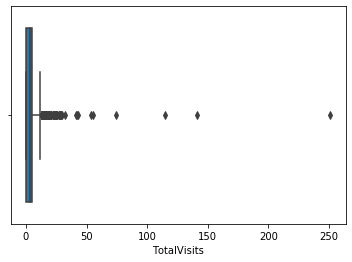

In [55]:
sns.boxplot(data_df["TotalVisits"])
plt.show()

* **From above boxplot it seems like TotalVisits have some outliers, like TotalVisits > 40. We will drop these rows**

In [56]:
# Getting list of index where TotalVisits > 40
index_list = list(data_df[data_df['TotalVisits'] >40].index)
index_list

[1160, 2190, 2322, 5283, 5530, 5538, 5608, 6102, 8230]

In [57]:
# Dropping those index/rows
data_df = data_df.drop(index_list)

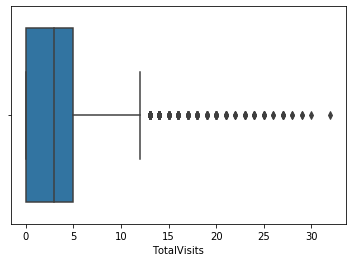

In [58]:
# Check for BoxPlot again
sns.boxplot(data_df["TotalVisits"])
plt.show()

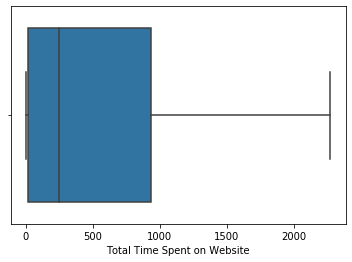

In [59]:
sns.boxplot(data_df["Total Time Spent on Website"])
plt.show()

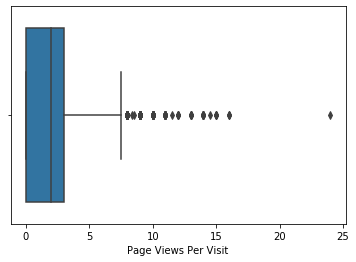

In [60]:
sns.boxplot(data_df['Page Views Per Visit'])
plt.show()

* **From above boxplot it seems like "Page Views Per Visit" have some outliers, like "Page Views Per Visit" > 20. We will drop these rows**

In [61]:
x =list(data_df[data_df['Page Views Per Visit'] > 20].index)
x

[6805]

In [62]:
# Dropping those index/rows
data_df = data_df.drop(x)

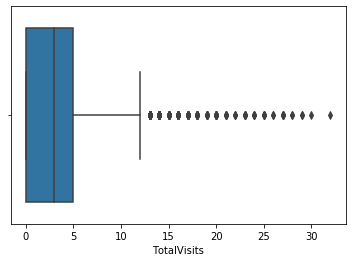

In [63]:
# Check for BoxPlot again
sns.boxplot(data_df["TotalVisits"])
plt.show()

### After doing Univariate analysis for numerical features using boxplot.
- We have dropped some rows based on outliers
- Lets find of rows and columns left after our all data cleaning process.
- Lets check for null values as well

In [64]:
print("Dataset volume Before and After\n\n")
print(f"Number of records Before: {data.shape[0]}\nNumber of features Before: {data.shape[1]}")
print(f"Number of records After: {data_df.shape[0]}\nNumber of features After: {data_df.shape[1]}")

Dataset volume Before and After


Number of records Before: 9240
Number of features Before: 37
Number of records After: 9230
Number of features After: 28


In [65]:
data_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [66]:
data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


# Data Prepration

## **Dummy creation for all categorical features**

In [67]:
# get list of categorical features from dataset

cat = data_df.select_dtypes(include = ['object'])
cat.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,India,Select,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Select,Student,Better Career Prospects,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Word Of Mouth,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Other,Unemployed,Better Career Prospects,...,No,No,No,No,No,No,No,No,No,Modified


* **Prospect ID is unique identifier so for this no need to create dummy variable** 

In [68]:
# removing Prospect ID
cat = cat.drop("Prospect ID", axis=1)
cat.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,India,Select,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Select,Student,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Word Of Mouth,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Other,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Modified


In [69]:
# creating dummy columns for categorical attributes
cat_dummies = pd.get_dummies(cat, drop_first = True)

In [70]:
cat_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Dropping categorical attributes from original datframe for which dummy columns are created
data_df.drop(columns = list(cat.columns), inplace = True)
data_df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0


In [72]:
# Concating Dummy columns created in original data frame
data_df = pd.concat([data_df, cat_dummies], axis = 1)
data_df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting data into Train and Test dataset

In [73]:
# Splitting Traget variable from independent variable

X= data_df.drop(columns= "Converted")
y= data_df["Converted"]

In [74]:
print(X.shape)
print(y.shape)

(9230, 85)
(9230,)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, random_state = 100, stratify = y)

In [76]:
print(f"Shape of Train Data{X_train.shape}")
print(f"Shape of Test Data{X_test.shape}")

Shape of Train Data(6461, 85)
Shape of Test Data(2769, 85)


In [77]:
X_train.head()

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354,8.0,246,2.67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859,7.0,1576,7.00,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177,8.0,172,8.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753,7.0,37,7.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
y_train.head()

2912    1
393     0
3875    1
1202    0
2908    0
Name: Converted, dtype: int64

## Scaling the Numerical features

In [79]:
# Fetching numerical attributes

num = X_train.select_dtypes(include = ['int64', 'float64'])
num.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2912,631712,0.0,0,0.00
393,656354,8.0,246,2.67
3875,622859,7.0,1576,7.00
1202,647177,8.0,172,8.00
2908,631753,7.0,37,7.00


In [80]:
# Importing Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
# Performing Scaling only on below, as not need to scale Lead Number it is unique identifier
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [82]:
X_train.head()

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712,-0.945664,-0.886799,-1.107573,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354,1.341417,-0.437714,0.181697,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859,1.055532,1.990270,2.272537,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177,1.341417,-0.572804,2.755410,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753,1.055532,-0.819254,2.272537,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
X_train_scaled = X_train.drop(["Prospect ID","Lead Number"], axis=1)

In [84]:
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2912,-0.945664,-0.886799,-1.107573,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
393,1.341417,-0.437714,0.181697,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,1.055532,1.990270,2.272537,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1202,1.341417,-0.572804,2.755410,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,1.055532,-0.819254,2.272537,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
X_test_scaled = X_test.drop(["Prospect ID","Lead Number"], axis=1)

In [86]:
X_test_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2762,-0.945664,-0.886799,-1.107573,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5808,-0.945664,-0.886799,-1.107573,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2177,-0.373894,-0.373819,-0.141828,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8013,-0.373894,-0.512561,-0.141828,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
641,-0.088009,-0.671384,-0.383264,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Logistic Regression Modelling

In [87]:
# importing libraries

from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr1.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred = lr1.predict(X_test_scaled)
y_pred
# these lables are generated by considering 0.5 as cut-off

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [89]:
lr1.predict_proba(X_test_scaled)

array([[0.01420784, 0.98579216],
       [0.00458047, 0.99541953],
       [0.86112034, 0.13887966],
       ...,
       [0.88318942, 0.11681058],
       [0.39763912, 0.60236088],
       [0.17940194, 0.82059806]])

In [90]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.812206572769953
Recall:  0.7069288389513109
Precision:  0.7848232848232848
F1-Score:  0.7438423645320198


* **Usinf RFE selecting top 15 features**

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()

rfe = RFE(lr2,15)  # Selecting top 15 attributes with high significance

rfe.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [92]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False])

In [93]:
X_test_scaled.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Do Not Call_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam'

In [94]:
# Selecting columns from X_train which is supported by RFE
col = list(X_train_scaled.columns[rfe.support_])
col

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'What is your current occupation_Housewife',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'What matters most to you in choosing a course_Other',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable']

In [95]:
X_train_scaled_rfe = X_train_scaled[col]
X_train_scaled_rfe.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
2912,-0.886799,0,1,0,0,1,0,0,0,1,0,0,0,0,0
393,-0.437714,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3875,1.990270,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1202,-0.572804,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2908,-0.819254,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [96]:
X_test_scaled_rfe = X_test_scaled[col]
X_test_scaled_rfe.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
2762,-0.886799,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5808,-0.886799,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2177,-0.373819,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8013,-0.512561,0,0,0,0,0,0,0,0,1,0,1,0,0,0
641,-0.671384,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [97]:
lr2 = LogisticRegression()
lr2.fit(X_train_scaled_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred2 = lr2.predict(X_test_scaled_rfe)
y_pred2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [99]:
lr2.predict_proba(X_test_scaled_rfe)

array([[0.00565281, 0.99434719],
       [0.00565281, 0.99434719],
       [0.83569284, 0.16430716],
       ...,
       [0.79504894, 0.20495106],
       [0.47302922, 0.52697078],
       [0.23459168, 0.76540832]])

In [100]:
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("Recall: ", recall_score(y_test, y_pred2))
print("Precision: ", precision_score(y_test, y_pred2))
print("F1-Score: ", f1_score(y_test, y_pred2))

Accuracy:  0.8057060310581438
Recall:  0.6947565543071161
Precision:  0.7777777777777778
F1-Score:  0.7339268051434225


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
X_train_vif = X_train_scaled_rfe
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values,i) for i in range(len(X_train_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending =False)

,features,VIF
9,What is your current occupation_Unemployed,2.40
11,What matters most to you in choosing a course_...,1.61
2,Lead Source_Olark Chat,1.58
5,Last Activity_SMS Sent,1.51
1,Lead Origin_Lead Add Form,1.50
3,Lead Source_Welingak Website,1.27
0,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.22
4,Do Not Email_Yes,1.19
6,Last Activity_Unsubscribed,1.09


* **looking into VIF score All features looks good.**

### Tuning Probability Cut-off

In [103]:
X_train.head()

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712,-0.945664,-0.886799,-1.107573,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354,1.341417,-0.437714,0.181697,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859,1.055532,1.990270,2.272537,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177,1.341417,-0.572804,2.755410,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753,1.055532,-0.819254,2.272537,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
prob = X_train[['Prospect ID','Lead Number']]
prob.head()

,Prospect ID,Lead Number
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753


In [105]:
# Adding actual Converted to prob dataframe
prob["y_actual"] =y_train
prob.head()

,Prospect ID,Lead Number,y_actual
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712,1
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354,0
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859,1
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177,0
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753,0


In [106]:
# Predicted values of Train dataset
lr2.predict_proba(X_train_scaled_rfe)

array([[0.40003302, 0.59996698],
       [0.95538452, 0.04461548],
       [0.27063243, 0.72936757],
       ...,
       [0.05082851, 0.94917149],
       [0.02840132, 0.97159868],
       [0.81671078, 0.18328922]])

In [107]:
prob["y=1|x"]= lr2.predict_proba(X_train_scaled_rfe)[:,1]
prob.head()

,Prospect ID,Lead Number,y_actual,y=1|x
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712,1,0.599967
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354,0,0.044615
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859,1,0.729368
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177,0,0.038656
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753,0,0.006300


In [108]:
# geberating cut offs

cutoff = [float(x)/10 for x in range (0,11)]
cutoff

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [109]:
for i in cutoff:
    prob[i]= prob["y=1|x"].map(lambda x:1 if x>i else 0)

In [110]:
prob.head()

,Prospect ID,Lead Number,y_actual,y=1|x,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
2912,bb0a28c2-9204-487d-b2bd-5471bfb84be1,631712,1,0.599967,1,1,1,1,1,1,0,0,0,0,0
393,3028eaf2-0e1e-4be1-b284-dab300b0b478,656354,0,0.044615,1,0,0,0,0,0,0,0,0,0,0
3875,665dff37-ecd9-4371-90cd-f075c72eaa25,622859,1,0.729368,1,1,1,1,1,1,1,1,0,0,0
1202,c9c3f903-5311-4253-93e5-7a54c638fc98,647177,0,0.038656,1,0,0,0,0,0,0,0,0,0,0
2908,e0759432-9c27-4f88-82fb-c3d83af8a4b2,631753,0,0.006300,1,0,0,0,0,0,0,0,0,0,0


In [111]:
#

cutoff_df = pd.DataFrame(columns=["prob","accuracy","recall","precision"])

for i in cutoff:
    a= accuracy_score(prob["y_actual"],prob[i])
    r = recall_score(prob['y_actual'], prob[i])
    p = precision_score(prob['y_actual'], prob[i])
    
    cutoff_df.loc[i] = [i,a,r,p]

In [112]:
cutoff_df

,prob,accuracy,recall,precision
0.0,0.0,0.385544,1.000000,0.385544
0.1,0.1,0.600681,0.985147,0.491095
0.2,0.2,0.753134,0.918507,0.621739
0.3,0.3,0.801424,0.829787,0.706425
0.4,0.4,0.816437,0.771578,0.756991
0.5,0.5,0.814735,0.696106,0.797608
0.6,0.6,0.796935,0.596146,0.829146
0.7,0.7,0.785018,0.526696,0.862024
0.8,0.8,0.750967,0.400642,0.895871
0.9,0.9,0.717536,0.288238,0.932468


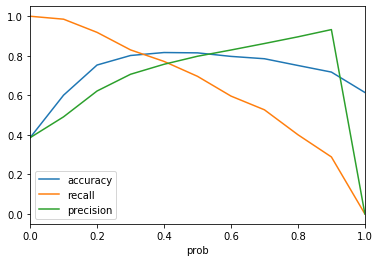

In [113]:
cutoff_df.plot.line(x="prob", y = ["accuracy","recall","precision"])
plt.show()

* **Optimal cut-off point seems to be at 0.35**

In [114]:
# generating probability of test data
lr2.predict_proba(X_train_scaled_rfe)

array([[0.40003302, 0.59996698],
       [0.95538452, 0.04461548],
       [0.27063243, 0.72936757],
       ...,
       [0.05082851, 0.94917149],
       [0.02840132, 0.97159868],
       [0.81671078, 0.18328922]])

In [115]:
lr2.predict_proba(X_train_scaled_rfe)[:,1]

array([0.59996698, 0.04461548, 0.72936757, ..., 0.94917149, 0.97159868,
       0.18328922])

In [116]:
y_pred_03 = list(map(lambda x: 1 if x >= 0.35 else 0, lr2.predict_proba(X_train_scaled_rfe)[:,1]))

In [117]:
print("train Scores\n\n")
print("Accuracy: ", accuracy_score(y_train, y_pred_03))
print("Recall: ", recall_score(y_train, y_pred_03))
print("Precision: ", precision_score(y_train, y_pred_03))
print("F1-Score: ", f1_score(y_train, y_pred_03))

train Scores


Accuracy:  0.8113295155548677
Recall:  0.8048976314733038
Precision:  0.7322863403944485
F1-Score:  0.766877031937273


In [118]:
lr2.predict_proba(X_test_scaled_rfe)

array([[0.00565281, 0.99434719],
       [0.00565281, 0.99434719],
       [0.83569284, 0.16430716],
       ...,
       [0.79504894, 0.20495106],
       [0.47302922, 0.52697078],
       [0.23459168, 0.76540832]])

In [119]:
y_pred_test_03 = list(map(lambda x: 1 if x >= 0.35 else 0, lr2.predict_proba(X_test_scaled_rfe)[:,1]))

In [120]:
print("test Scores\n\n")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_03))
print("Recall: ", recall_score(y_test, y_pred_test_03))
print("Precision: ", precision_score(y_test, y_pred_test_03))
print("F1-Score: ", f1_score(y_test, y_pred_test_03))

test Scores


Accuracy:  0.7995666305525461
Recall:  0.8043071161048689
Precision:  0.7128630705394191
F1-Score:  0.7558293004839418


In [121]:
X_test_scaled_rfe.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
2762,-0.886799,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5808,-0.886799,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2177,-0.373819,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8013,-0.512561,0,0,0,0,0,0,0,0,1,0,1,0,0,0
641,-0.671384,0,0,0,0,0,0,0,0,1,0,1,0,0,0
